**Supervised**

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv("heart_2020_cleaned.csv")

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df.shape

(319795, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df.isnull().sum()
#no missing values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
df['SkinCancer'].value_counts()

SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64

In [11]:
#mapping={'Graduate':1,'Enrolled':0,'Dropout':2}
#df['Target']=df['Target'].map(mapping)
#print(df['Target'].unique())
from sklearn.preprocessing import LabelEncoder
df_numeric = df.copy()
le = LabelEncoder()
df_numeric['SkinCancer'] = le.fit_transform(df_numeric['SkinCancer'].astype(str))
df_numeric['HeartDisease'] = le.fit_transform(df_numeric['HeartDisease'].astype(str))
df_numeric['Smoking'] = le.fit_transform(df_numeric['Smoking'].astype(str))
df_numeric['AlcoholDrinking'] = le.fit_transform(df_numeric['AlcoholDrinking'].astype(str))
df_numeric['Stroke'] = le.fit_transform(df_numeric['Stroke'].astype(str))
df_numeric['DiffWalking'] = le.fit_transform(df_numeric['DiffWalking'].astype(str))
df_numeric['Diabetic'] = le.fit_transform(df_numeric['Diabetic'].astype(str))
df_numeric['PhysicalActivity'] = le.fit_transform(df_numeric['PhysicalActivity'].astype(str))
df_numeric['Asthma'] = le.fit_transform(df_numeric['Asthma'].astype(str))
df_numeric['KidneyDisease'] = le.fit_transform(df_numeric['KidneyDisease'].astype(str))
df_numeric['Sex'] = le.fit_transform(df_numeric['Sex'].astype(str))
df_numeric['Race'] = le.fit_transform(df_numeric['Race'].astype(str))
df_numeric['GenHealth'] = le.fit_transform(df_numeric['GenHealth'].astype(str))
df_numeric['AgeCategory'] = le.fit_transform(df_numeric['AgeCategory'].astype(str))

In [12]:
df.select_dtypes("number").columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

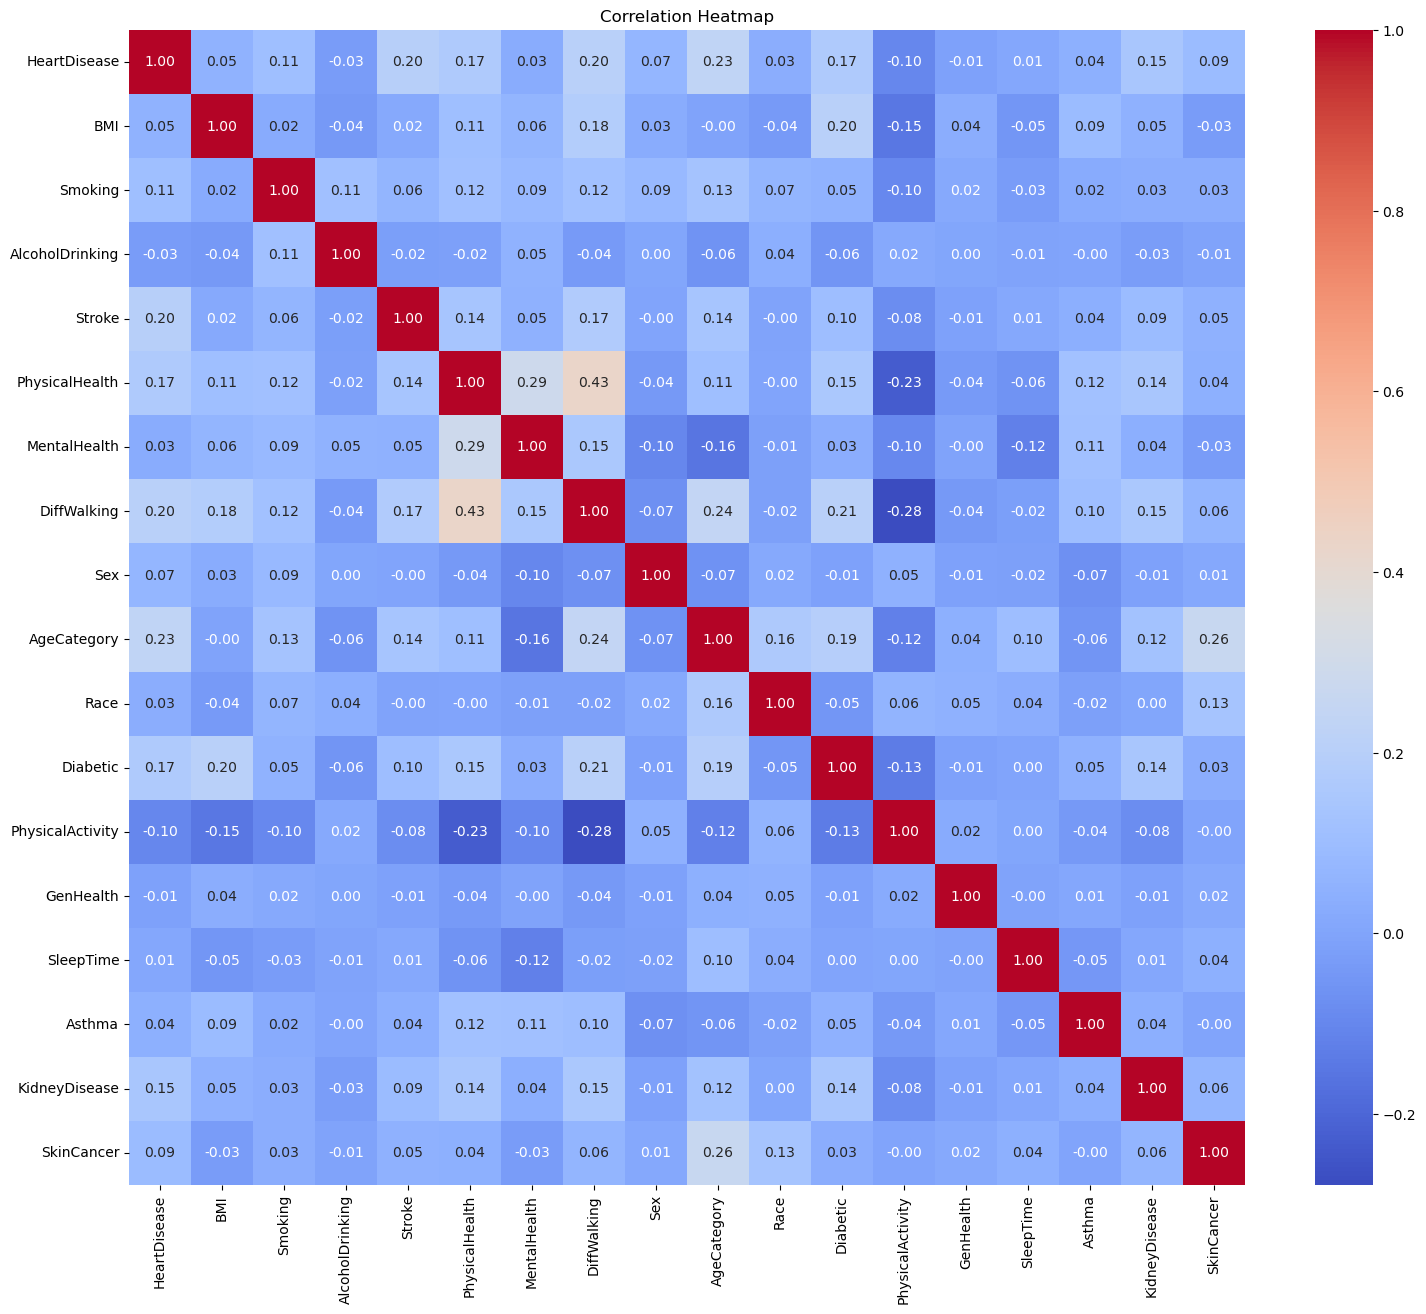

In [13]:
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
X=df_numeric[['AgeCategory']]
y=df_numeric['SkinCancer']

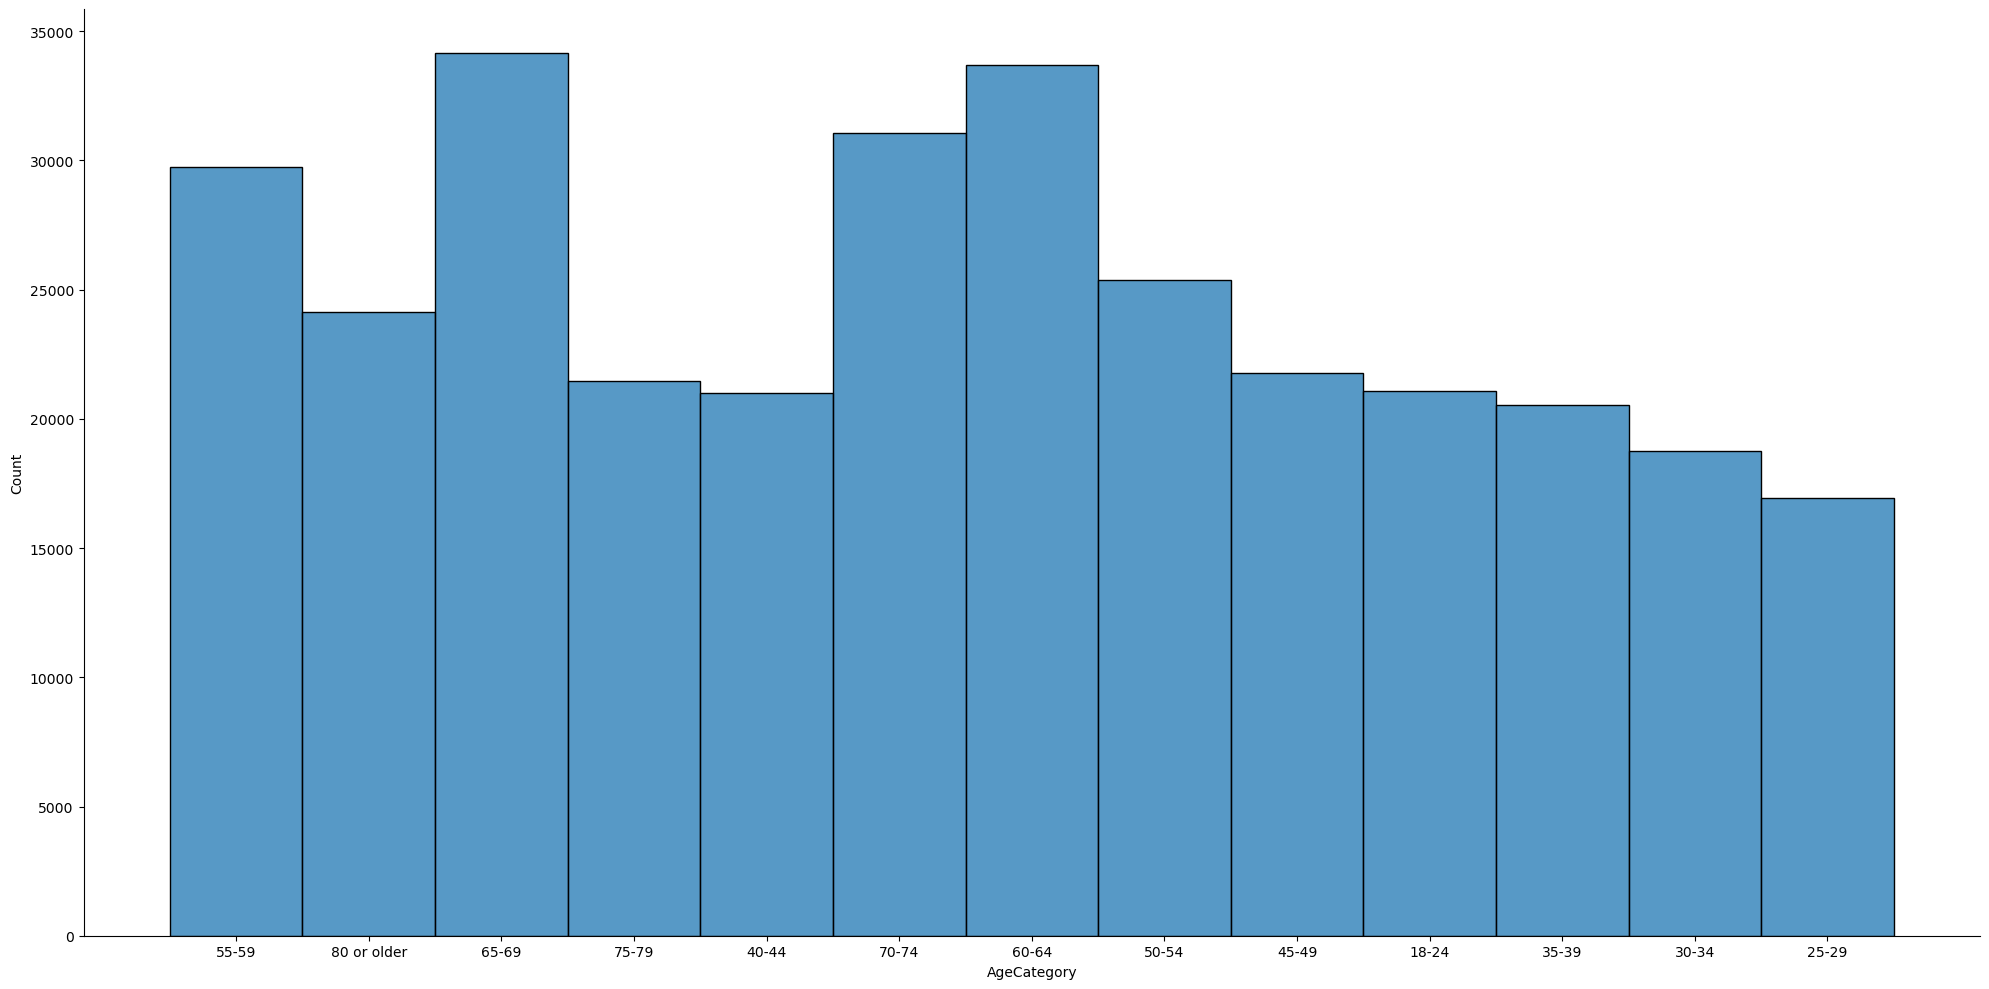

In [15]:
for i in X:
    sns.displot(df,x=i,bins=1000,height=10,aspect=2)

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
x_train, y_train = sm.fit_resample(x_train, y_train)

**Logistic Regression**

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
param_dist = {'C': [0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
random_search = RandomizedSearchCV(estimator=lm, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_

lm=LogisticRegression(solver='lbfgs',random_state=0,C=best_params['C'])
solver=best_params['solver']
lm.fit(x_train,y_train)

LogisticRegression(C=100, random_state=0)

In [115]:
predict=lm.predict(x_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


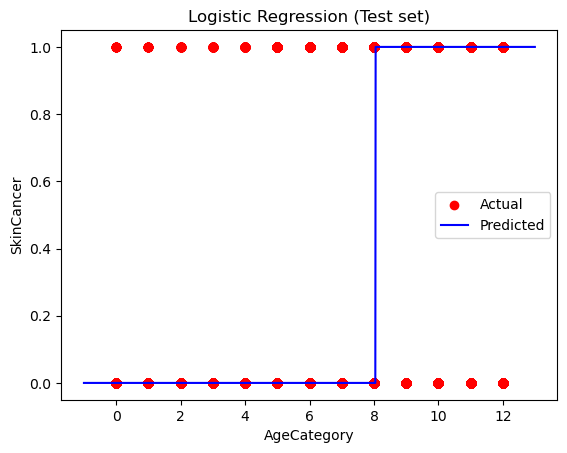

In [117]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

x_set, y_set = x_test, y_test

x_set = x_set.values
x1 = np.arange(start=x_set.min() - 1, stop=x_set.max() + 1, step=0.01)

y_pred = lm.predict(x1.reshape(-1, 1))

plt.scatter(x_set[:, 0], y_set, color='red', label='Actual')
plt.plot(x1, y_pred, color='blue', label='Predicted')
plt.title('Logistic Regression (Test set)')
plt.xlabel('AgeCategory')
plt.ylabel('SkinCancer')
plt.legend()
plt.show()

In [119]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.692662486905674


In [121]:
from sklearn import metrics

In [123]:
Precision = metrics.precision_score(y_test, predict,average='weighted')

print(f'Precision: {Precision}')

Precision: 0.8875788285554517


In [125]:
Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(f'Sensitivity_recall:{Sensitivity_recall}')

Sensitivity_recall:0.692662486905674


In [127]:
Specificity = metrics.recall_score(y_test,predict,average='weighted')
print(f'Specificity:{Specificity}')

Specificity:0.692662486905674


In [129]:
F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(f'F1_score:{F1_score}')

F1_score:0.7563639302422798


In [131]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.52864148 0.53040901 0.6634262  0.55824756 0.55836136]
Average CV Score:  0.5678171220808437
Number of CV Scores used in Average:  5


In [132]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = sk_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.69999461 0.70041494 0.703368   0.70079215 0.70438869]
Average CV Score:  0.7017916783719086
Number of CV Scores used in Average:  5


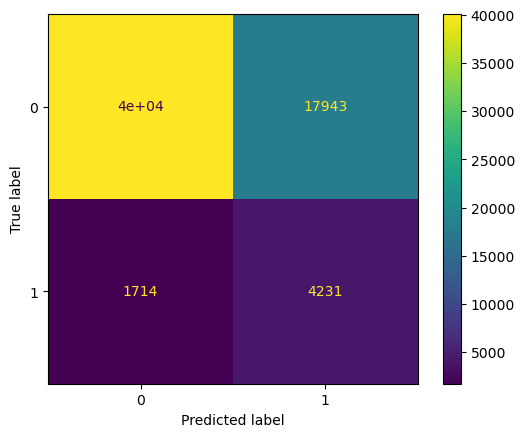

In [134]:
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

In [178]:
y_pred_prob = lm.predict_proba(x_test)

In [180]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1])  

In [182]:
y_pred_prob=np.array(y_pred_prob)
y_pred_prob=y_pred_prob[:,0]


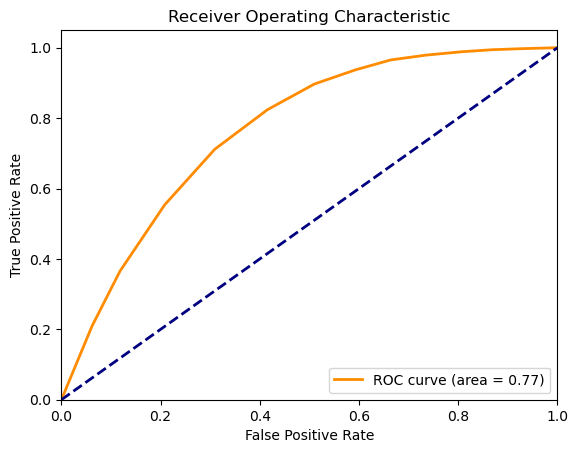

ROC AUC score: 0.77


In [184]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = lm.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(f'ROC AUC score: {roc_auc:.2f}')

**Random Forest**

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier  
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf= RandomForestClassifier(random_state=42)
param_dist = {'n_neighbors': np.arange(1, 10)}
knn_cv = RandomizedSearchCV(rf, param_grid, n_iter=5, cv=3, n_jobs=-1)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_)

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [149]:
lm= RandomForestClassifier(n_estimators= 100,min_samples_split=10,min_samples_leaf=4,max_depth=10,class_weight='balanced') 
lm.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10)

In [150]:
predict=lm.predict(x_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


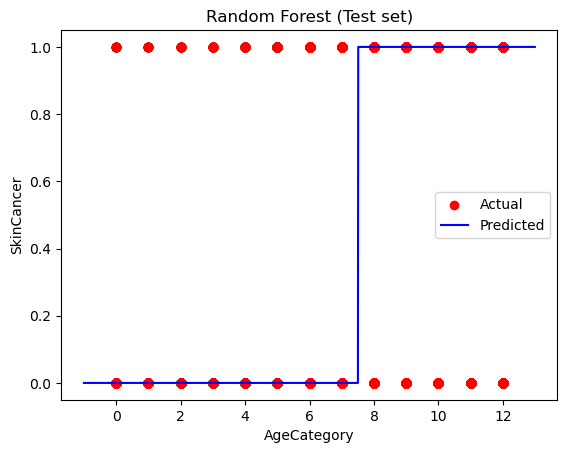

In [151]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

x_set, y_set = x_test, y_test

x_set = x_set.values
x1 = np.arange(start=x_set.min() - 1, stop=x_set.max() + 1, step=0.01)

y_pred = lm.predict(x1.reshape(-1, 1))

plt.scatter(x_set[:, 0], y_set, color='red', label='Actual')
plt.plot(x1, y_pred, color='blue', label='Predicted')
plt.title('Random Forest (Test set)')
plt.xlabel('AgeCategory')
plt.ylabel('SkinCancer')
plt.legend()
plt.show()

In [170]:
y_pred_prob = lm.predict_proba(x_test)

In [172]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1])  

In [174]:
y_pred_prob=np.array(y_pred_prob)
y_pred_prob=y_pred_prob[:,0]


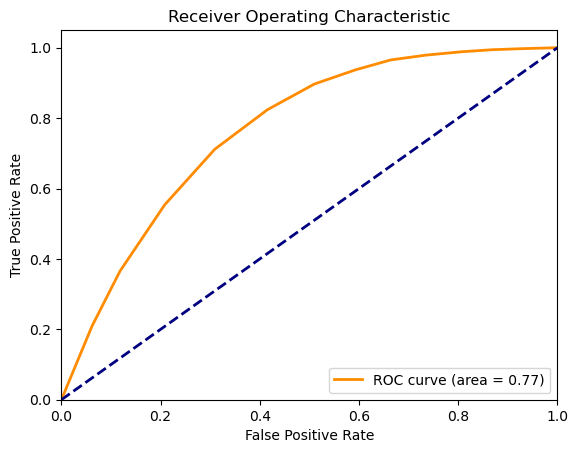

ROC AUC score: 0.77


In [176]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = lm.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(f'ROC AUC score: {roc_auc:.2f}')

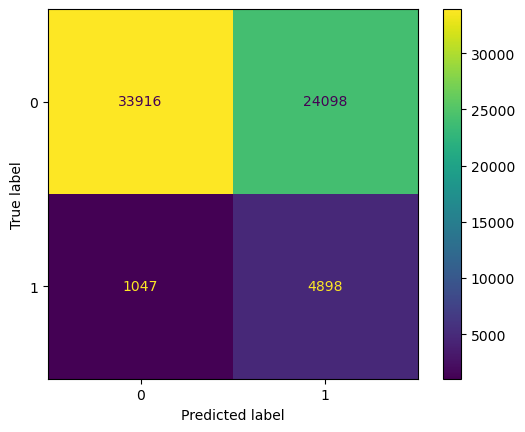

In [186]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

In [188]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6068575180975312


In [190]:
Precision = metrics.precision_score(y_test, predict,average='weighted')
print(Precision)

0.8955884955292168


In [192]:
Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(Sensitivity_recall)

0.6068575180975312


In [194]:
Specificity = metrics.recall_score(y_test,predict,average='weighted')
print(Specificity)

0.6068575180975312


In [196]:
F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(F1_score)

0.6878036989201903


In [198]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.60687611 0.60925796 0.6634262  0.82499326 0.82512071]
Average CV Score:  0.7059348496431761
Number of CV Scores used in Average:  5


In [199]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = sk_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.70456432 0.70475831 0.70716172 0.70555585 0.70763278]
Average CV Score:  0.7059345963954982
Number of CV Scores used in Average:  5


**Unsupervised Learning**

In [203]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
x=df_numeric[['AgeCategory','SkinCancer']]
x=np.array(x)

**K-means Clustering**

In [206]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)

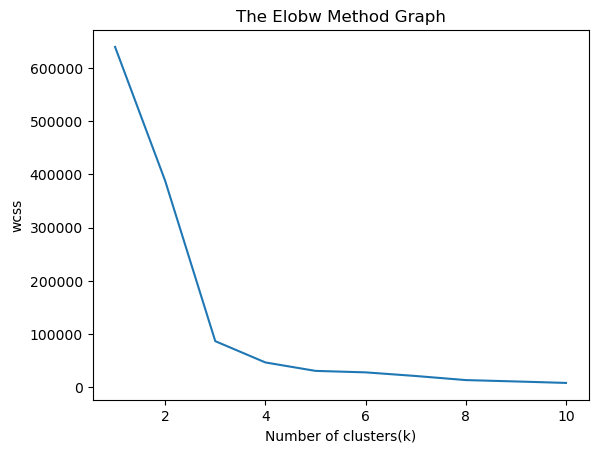

In [208]:
from sklearn.cluster import KMeans  
wcss=[]
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 0)  
    kmeans.fit(x)  
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss')  
plt.show()

In [210]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)
labels = kmeans.labels_

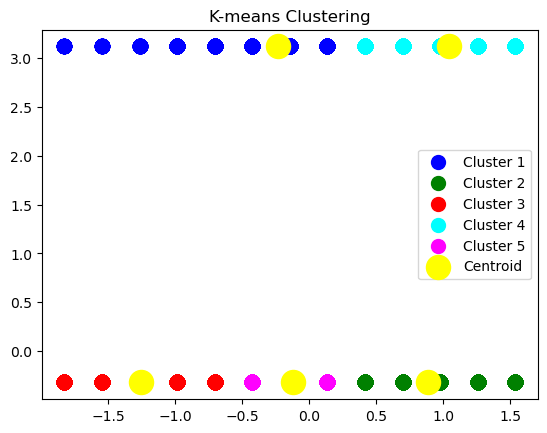

In [212]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('K-means Clustering')  

plt.legend()  
plt.show()

In [214]:
ch_score = calinski_harabasz_score(x, labels)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 1126559.895437179


In [216]:
score = davies_bouldin_score(x, labels)
print(score)

0.5185003957790746


**Hierarchical Clustering**

In [221]:
sample_data = df_numeric.sample(frac=0.01, random_state=42)
x_sample=sample_data[['AgeCategory','SkinCancer']]
x_sample=np.array(x_sample)
x_sample.shape

(3198, 2)

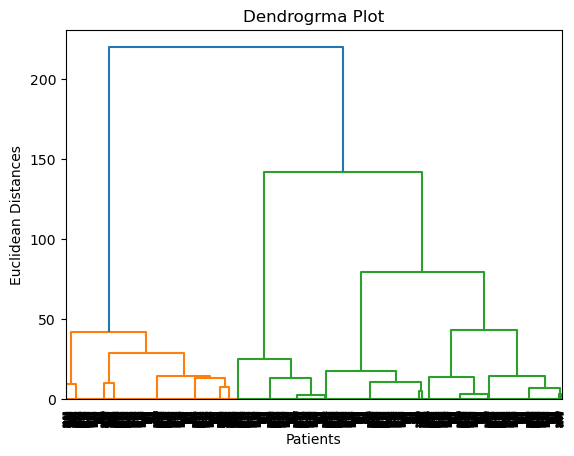

In [223]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x_sample, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Patients")  
plt.show()

In [225]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x_sample)  
labels=hc.labels_

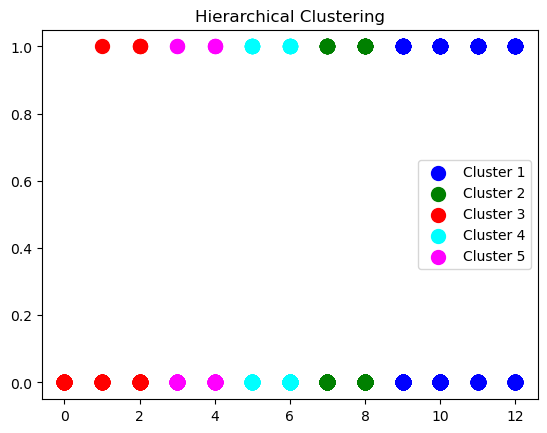

In [227]:
x=x_sample
y_predict=y_pred
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Hierarchical Clustering')   
plt.legend()  
plt.show()

In [229]:
ch_score = calinski_harabasz_score(x, labels)
print(f'Calinski-Harabasz Index: {ch_score}')

Calinski-Harabasz Index: 12463.204406909543


In [231]:
score = davies_bouldin_score(x, labels)
print(score)

0.5391726013722697
